# Majors Project Part 3
# Jean Halaby
# 10/08/25

# This notebook will serve as the visualization and data analysis part of project #1.

In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Import Data
df = pd.read_csv("MajorsSurveyProject_cleaned.csv")
df.head()

,timestamp,course,heard_ccm_web,heard_ccm_socials,heard_ccm_community,heard_ccm_fam_friend,heard_ccm_student,heard_ccm_alumni,heard_ccm_hs_teach,heard_ccm_hs_counselor,...,comp_info_employer,comp_info_workforce,comp_info_njworkforce,comp_info_other,first_choice,scale_rating_reason,reason,gender,race,age
0,2024/09/09 12:33:58 PM AST,CMP 128 Computer Science I,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Unknown,Unknown,Unknown,Unknown,Unknown,2.0,Quite difficult and I do not see myself using ...,Man,White,21-24
1,2024/09/09 6:00:11 PM AST,Unknown,No,No,Yes,No,No,No,Yes,Don't recall,...,No,No,No,Don't recall,First Choice,Unknown,Unknown,Man,Hispanic or Latino;White/Caucasian;Multi-Racial,18 and younger
2,2024/09/10 9:00:12 AM AST,CMP 128 Computer Science I,No,No,No,Yes,No,Yes,No,Yes,...,No,No,No,No,First Choice,Unknown,Unknown,Man,Hispanic or Latino;Asian,18 and younger
3,2024/09/10 12:34:53 PM AST,CMP 128 Computer Science I,Yes,Yes,Yes,Yes,No,No,Yes,Yes,...,Unknown,Unknown,Unknown,Unknown,Unknown,3.0,It all depends on what classes are required fo...,Man,Hispanic,19-20
4,2024/09/10 3:06:47 PM AST,CMP 128 Computer Science I,No,No,No,Yes,No,No,Yes,No,...,Yes,No,No,Yes,First Choice,Unknown,Unknown,Man,Asian,19-20


In [ ]:
# Questions for Part 3 Analysis

In [ ]:
# Q1: What are the most common ways students reported first hearing about CCM?

/var/folders/rh/smwrbx894cnblfv39g37dbmc0000gn/T/ipykernel_47828/2676919104.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=heard_percent.values, y=heard_percent.index, palette="viridis")


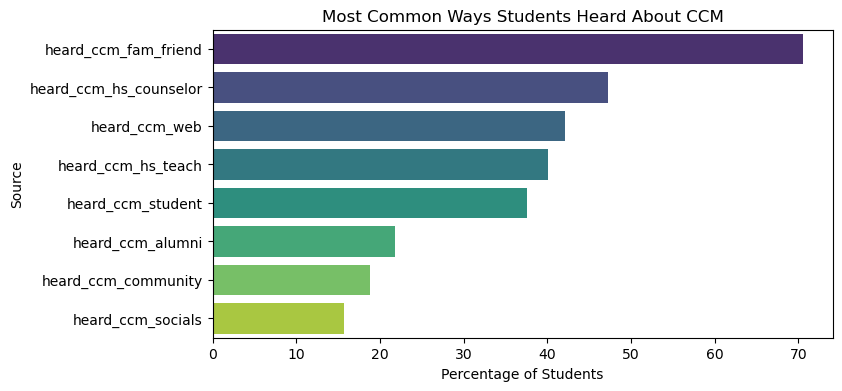

heard_ccm_fam_friend      70.558376
heard_ccm_hs_counselor    47.208122
heard_ccm_web             42.131980
heard_ccm_hs_teach        40.101523
heard_ccm_student         37.563452
heard_ccm_alumni          21.827411
heard_ccm_community       18.781726
heard_ccm_socials         15.736041
dtype: float64

In [4]:
# Select the "Heard about CCM" Columns
heard_cols = [col for col in df.columns if col.startswith('heard_ccm')]

# Count how many students said "Yes" for each
heard_counts = (df[heard_cols] == 'Yes').sum().sort_values(ascending=False)

# Convert to Percentage
heard_percent = (heard_counts / len(df)) * 100

# Plot Results
plt.figure(figsize=(8, 4))
sns.barplot(x=heard_percent.values, y=heard_percent.index, palette="viridis")
plt.title("Most Common Ways Students Heard About CCM")
plt.xlabel("Percentage of Students")
plt.ylabel("Source")
# Displaying Data
plt.show()

heard_percent

## The most common ways students heard about CCM according to the survey was family & friends followed by their high school conselor. This suggests word of mouth sharing plays a vital role in CCM recruitment.

In [ ]:
# Q2: What is the age distribution of students in computing majors?

/var/folders/rh/smwrbx894cnblfv39g37dbmc0000gn/T/ipykernel_47828/529075987.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age', order=age_order, palette='Blues', edgecolor='black')


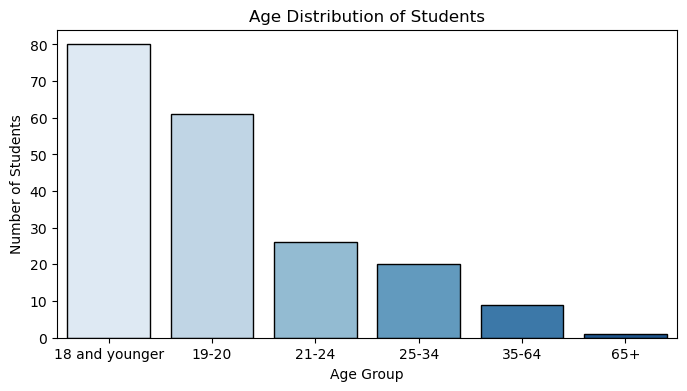

In [10]:
# To Order the Ages
age_order = [
    "18 and younger",
    "19-20",
    "21-24",
    "25-34",
    "35-64",
    "65+"
]

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='age', order=age_order, palette='Blues', edgecolor='black')
plt.title("Age Distribution of Students")
plt.xlabel("Age Group")
plt.ylabel("Number of Students")
# Displaying Data
plt.show()

## The most common age of students with a computing major are 20 or younger, I think this shows that CCM should try to appeal more to older people but still connect with the younger generation of students.

In [ ]:
# Q3: What were the most common scale ratings for interest in taking another class?

/var/folders/rh/smwrbx894cnblfv39g37dbmc0000gn/T/ipykernel_47828/38425068.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_percent.index, y=rating_percent.values, palette='crest', edgecolor='black')


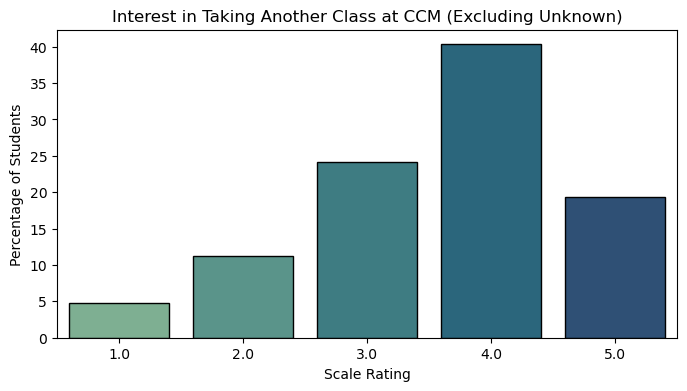

In [13]:
# Remove 'Unknown' or Missing Entries
filtered_ratings = df[df['scale_rating_reason'].notna() & (df['scale_rating_reason'] != 'Unknown')]

# Count the Valid Ratings
rating_counts = filtered_ratings['scale_rating_reason'].value_counts().sort_index()

# Convert to Percentages
rating_percent = (rating_counts / len(filtered_ratings)) * 100

# Plot
plt.figure(figsize=(8,4))
sns.barplot(x=rating_percent.index, y=rating_percent.values, palette='crest', edgecolor='black')
plt.title("Interest in Taking Another Class at CCM (Excluding Unknown)")
plt.xlabel("Scale Rating")
plt.ylabel("Percentage of Students")
plt.show()

## There are clearly students who are interested in taking follow up computing classes. They should also focus on the lower percent of students however and focus on their needs to raise their scale rating.